In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

#set global settings 
pd.set_option("display.max_columns", 100)

print("Libraries loaded")

Libraries loaded


In [2]:
PROJECT = Path.cwd().parents[0]
CLEAN_DATA = PROJECT / "data" / "clean"
OUTPUTS = PROJECT / "outputs"

print("Project structure set:")
print("Clean data -->", CLEAN_DATA)
print("Outputs -->", OUTPUTS)

Project structure set:
Clean data --> /Users/juliaalie/Documents/app-market-analysis-1/data/clean
Outputs --> /Users/juliaalie/Documents/app-market-analysis-1/outputs


In [3]:
ios = pd.read_csv(CLEAN_DATA / "AppleStore_clean.csv")
android = pd.read_csv(CLEAN_DATA / "googleplaystore_clean.csv")

print(ios.shape)
print(android.dtypes)

(3220, 17)
App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs           object
Type               object
Price               int64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


In [6]:
#IOS Final Exports
ios_final = ios.groupby("prime_genre").agg(
    num_apps=("track_name", "count"),
    avg_installs=("rating_count_tot", "mean"),
    avg_rating=("user_rating", "mean")
).reset_index()

ios_final.head()

ios_final.to_csv(OUTPUTS / "ios_final.csv", index=False)

In [12]:
#Android Final Exports
android_final = android.groupby("Category").agg(
    num_apps=("App", "count"),
    avg_installs=("Installs", "mean"),
    avg_rating=("Rating", "mean")
).reset_index()

android_final.head()

android_final.to_csv(OUTPUTS / "android_final.csv", index=False)

<Figure size 1000x700 with 0 Axes>

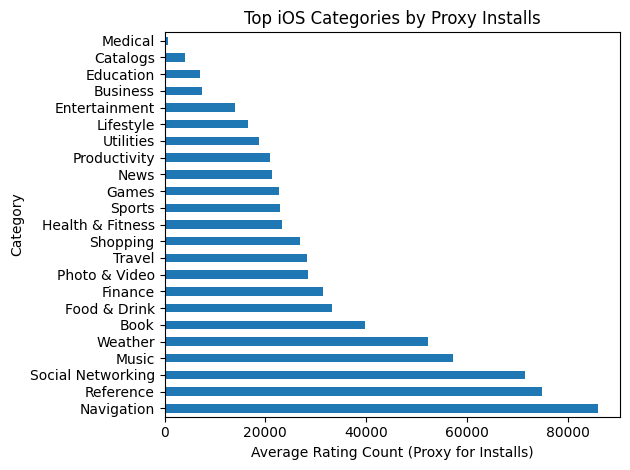

In [ ]:
##IOS Plot
plt.figure(figsize=(10,7))
ios_final.sort_values("avg_installs", ascending=False).plot(
    x="prime_genre", y="avg_installs", kind="barh", legend=False,
    title="Top iOS Categories by Proxy Installs"
)
plt.xlabel("Average Rating Count (Proxy for Installs)")
plt.ylabel("Category")
plt.tight_layout()
plt.savefig(OUTPUTS / "ios_top_categories.png", dpi=300)
plt.show()

<Figure size 1000x700 with 0 Axes>

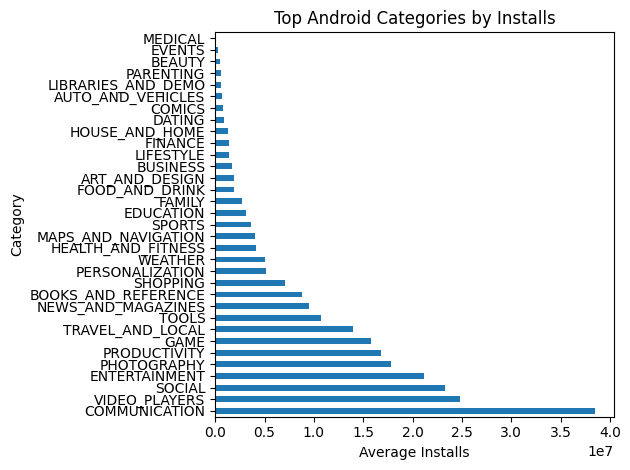

In [19]:
##Android Plot
plt.figure(figsize=(10,7))
android_final.sort_values("avg_installs", ascending=False).plot(
    x="Category", y="avg_installs", kind="barh", legend=False,
    title="Top Android Categories by Installs"
)
plt.xlabel("Average Installs")
plt.ylabel("Category")
plt.tight_layout()
plt.savefig(OUTPUTS / "android_top_categories.png", dpi=300)
plt.show()